In [1]:
!pip install kaggle
from google.colab import files
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kimbbaro","key":"0eee4ddbd0a80636c2a3f8146af07993"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Permission Warning 방지
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c porto-seguro-safe-driver-prediction

 98% 75.0M/76.5M [00:04<00:00, 26.8MB/s]
100% 76.5M/76.5M [00:04<00:00, 19.7MB/s]


In [4]:
!unzip /content/porto-seguro-safe-driver-prediction.zip

Archive:  /content/porto-seguro-safe-driver-prediction.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tle
import warnings
from collections import Counter
#두 변수 사이의 종속성을 측정하는 데 사용됩니다.
from sklearn.feature_selection import mutual_info_classif
warnings.filterwarnings('ignore')

In [6]:
train = pd.read_csv("/content/train.csv")
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [7]:
rows = train.shape[0]
columns = train.shape[1]
print("The train dataset contains {0} rows and {1} columns".format(rows, columns))

The train dataset contains 595212 rows and 59 columns


In [8]:
train.isnull().any()

id                False
target            False
ps_ind_01         False
ps_ind_02_cat     False
ps_ind_03         False
ps_ind_04_cat     False
ps_ind_05_cat     False
ps_ind_06_bin     False
ps_ind_07_bin     False
ps_ind_08_bin     False
ps_ind_09_bin     False
ps_ind_10_bin     False
ps_ind_11_bin     False
ps_ind_12_bin     False
ps_ind_13_bin     False
ps_ind_14         False
ps_ind_15         False
ps_ind_16_bin     False
ps_ind_17_bin     False
ps_ind_18_bin     False
ps_reg_01         False
ps_reg_02         False
ps_reg_03         False
ps_car_01_cat     False
ps_car_02_cat     False
ps_car_03_cat     False
ps_car_04_cat     False
ps_car_05_cat     False
ps_car_06_cat     False
ps_car_07_cat     False
ps_car_08_cat     False
ps_car_09_cat     False
ps_car_10_cat     False
ps_car_11_cat     False
ps_car_11         False
ps_car_12         False
ps_car_13         False
ps_car_14         False
ps_car_15         False
ps_calc_01        False
ps_calc_02        False
ps_calc_03      

In [10]:
train.isnull().any().any()

False

In [11]:
train_copy = train
train_copy = train_copy.replace(-1, np.NaN)

<Axes: >

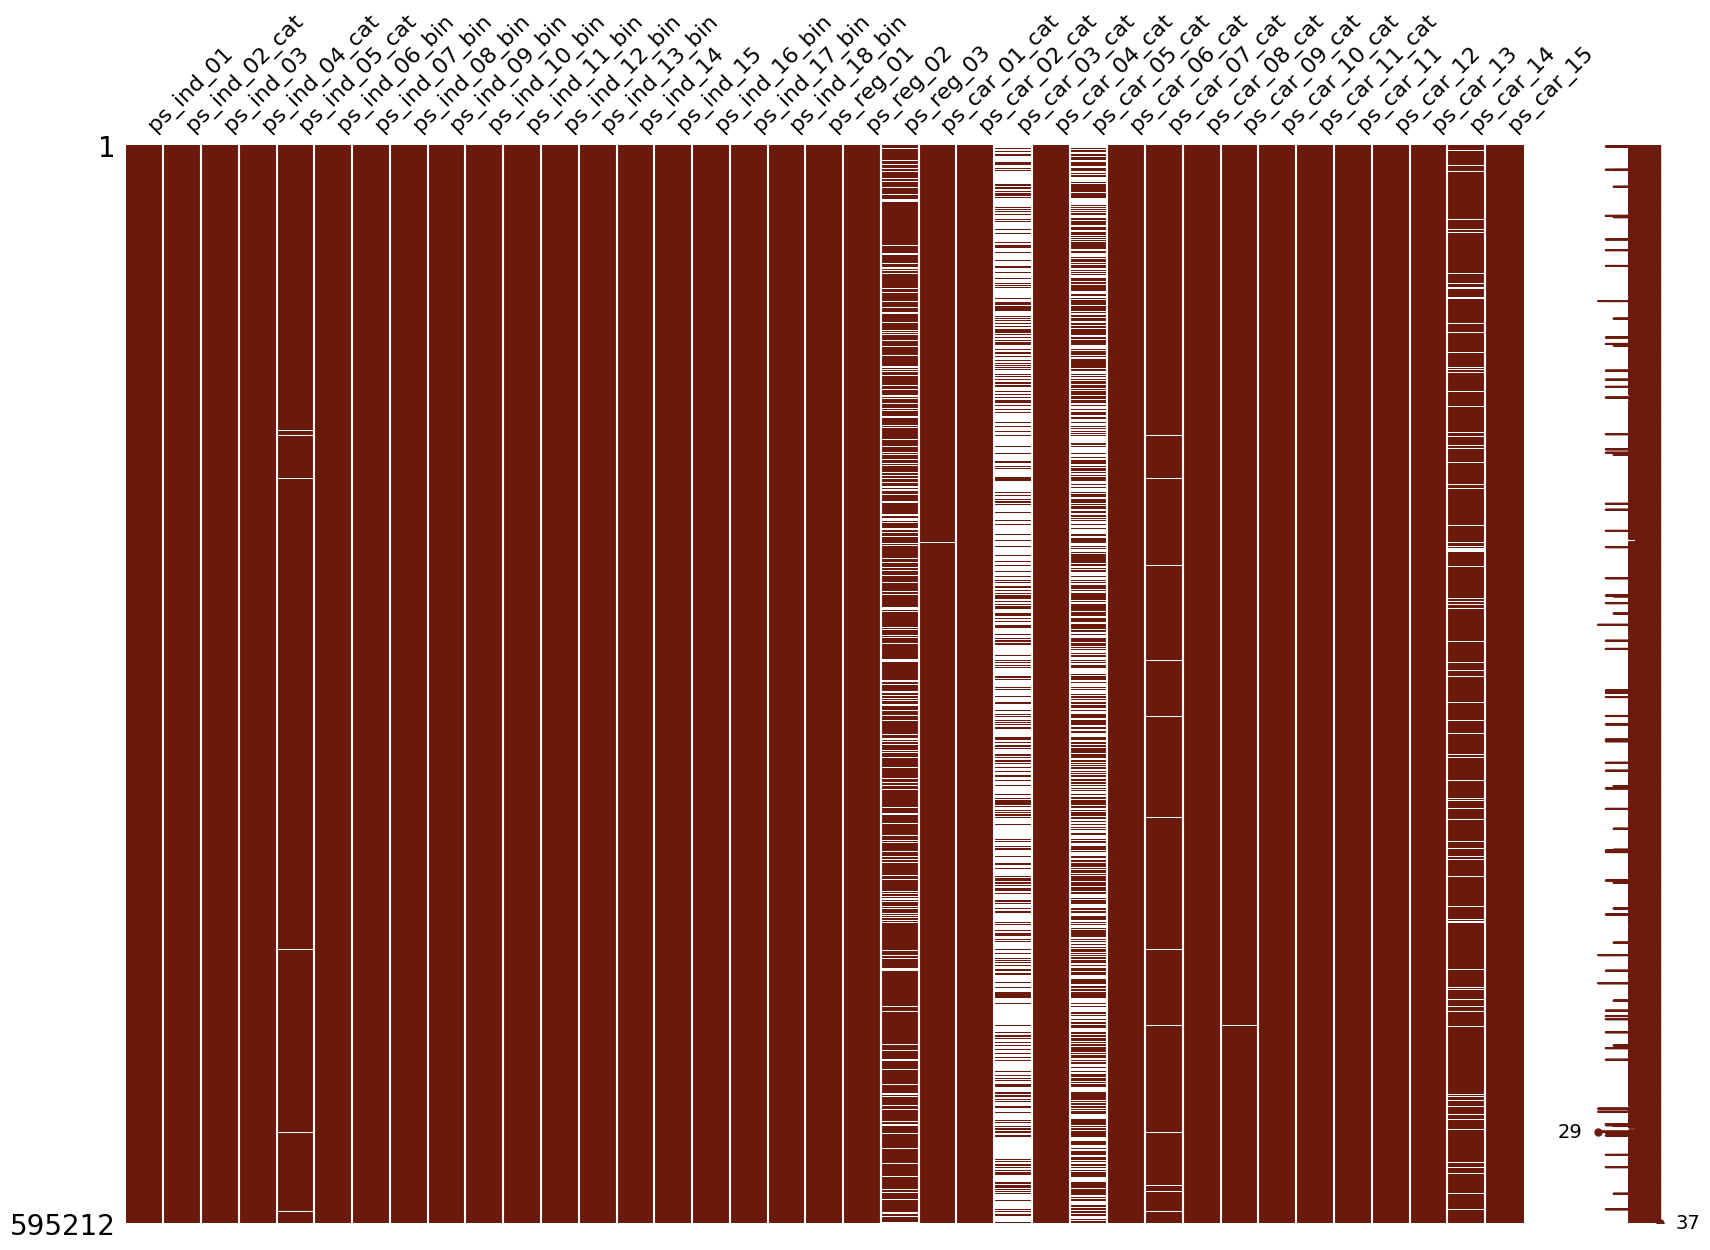

In [12]:
import missingno as msno
msno.matrix(df=train_copy.iloc[:,2:39], figsize = (20,14), color = (0.42, 0.1, 0.05))

In [16]:
data = [go.Bar(
    x=train["target"].value_counts().index.values,
    y=train["target"].value_counts().values,
    text="Distribution of target variable"
)]

layout = go.Layout(
    title = "Target variable distribution"
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = "basic-bar")

In [17]:
Counter(train.dtypes.values)


Counter({dtype('int64'): 49, dtype('float64'): 10})

In [18]:
train_float = train.select_dtypes(include= ["float64"])
train_int = train.select_dtypes(include = ["int64"])


<Axes: title={'center': 'Pearson correlation of continuous features'}>

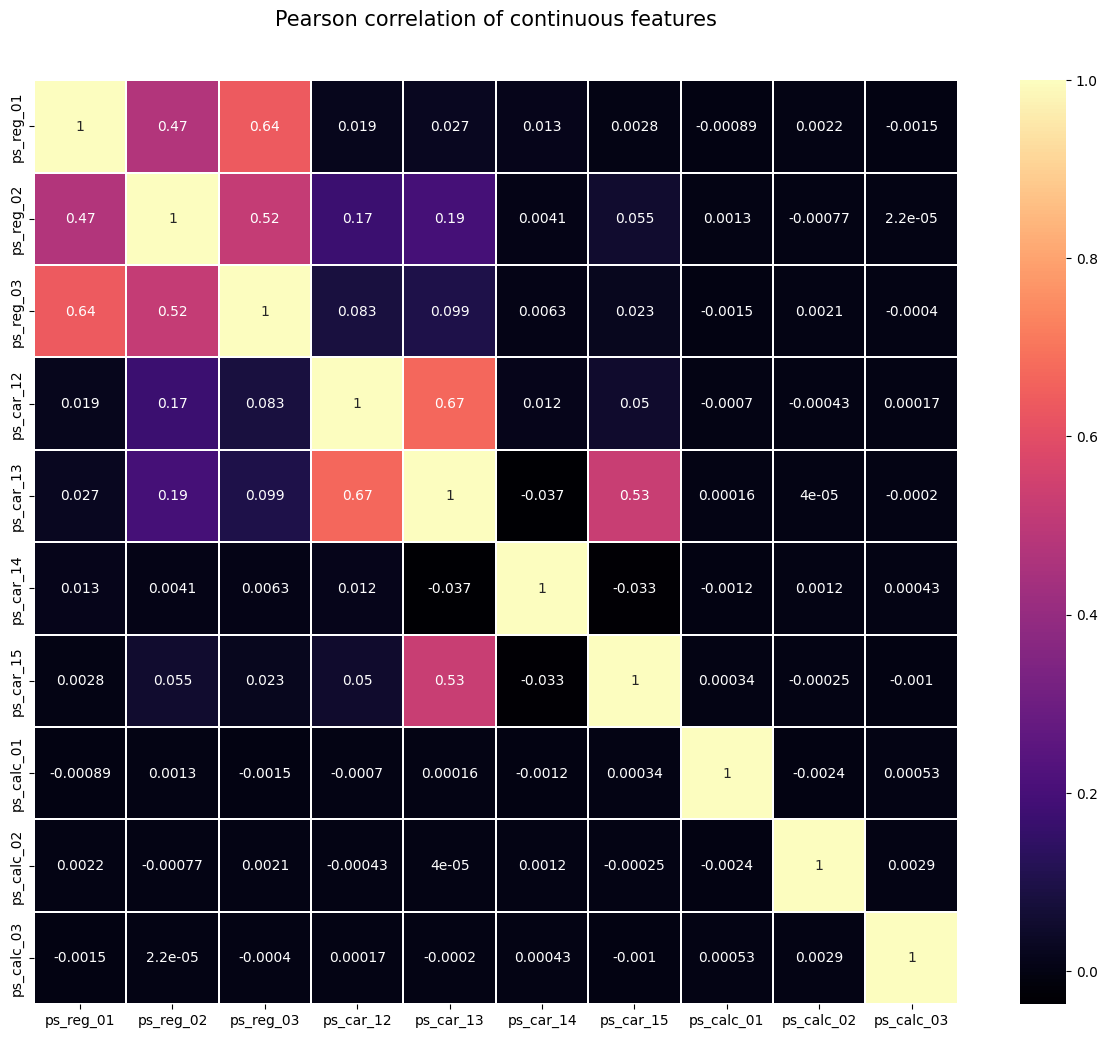

In [19]:
colormap = plt.cm.magma
plt.figure(figsize = (16,12))
plt.title("Pearson correlation of continuous features", y= 1.05, size = 15)
sns.heatmap(train_float.corr(), linewidths=0.1, vmax = 1.0, square = True,
            cmap = colormap, linecolor = "white", annot = True)

In [26]:
# data = [
#     go.Heatmap(
#         z = train_int.corr().values,
#         x = train_int.columns.values,
#         y = train_int.columns.values,
#         colorscale = "Viridis",
#         reversescale = False,
#         text = True,
#         opacity =1.0
#     )
# ]

data = [
    go.Heatmap(
        z = train_int.corr().values,
        x = train_int.columns.values,
        y = train_int.columns.values,
        colorscale = "Viridis",
        reversescale = False,
      
        opacity = 1.0
    )
]

layout = go.Layout(
    title ="Pearson Correlation of Integer-type features",
    xaxis = dict(ticks="", nticks = 36),
    yaxis = dict(ticks = ""),
    width = 900, height = 700
)

fig = go.Figure(data=data , layout = layout)
py.iplot(fig, filename = "labelled-heatmap")

상호 정보량(Mutual Information)은 타겟 변수와 해당 기능 사이의 상호 정보량을 검사할 수 있는 또 다른 유용한 도구입니다

In [27]:
mf = mutual_info_classif(train_float.values, train.target.values, n_neighbors=3, random_state = 17)
print(mf)

[0.02599971 0.00767074 0.00617141 0.01855302 0.00158483 0.00338192
 0.01668813 0.0134428  0.01334669 0.01348572]


In [28]:
bin_col = [col for col in train.columns if '_bin' in col]
zero_list = []
one_list = []
for col in bin_col:
  zero_list.append((train[col] == 0).sum())
  one_list.append((train[col] == 1).sum())

In [29]:
trace1 = go.Bar(
    x = bin_col,
    y = zero_list, 
    name = "Zero count"
)
trace2 = go.Bar(
    x= bin_col,
    y = one_list,
    name = "One count"
)

data = [trace1, trace2]
layout = go.Layout(
    barmode = "stack",
    title = "Count of 1 and 0 in binary variables"
)

fig = go.Figure(data = data, layout=layout)
py.iplot(fig, filename = "stacked-bar")

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 150, max_depth = 8,  min_samples_leaf =4, max_features = 0.2, n_jobs = -1,
                            random_state = 0)
rf.fit(train.drop(["id", "target"], axis = 1), train.target)
features = train.drop(["id", "target"], axis = 1).columns.values
print("-------Training Done ------")

-------Training Done ------


In [34]:
trace = go.Scatter(
    y = rf.feature_importances_,
    x= features,
    mode = "markers",
    marker = dict(
        sizemode = "diameter",
        sizeref = 1,
        size = 13,
        color = rf.feature_importances_,
        colorscale = "Portland",
        showscale = True
    ),
    text = features
)
data = [trace]

layout = go.Layout(
    autosize = True,
    title = "Random forest feature importance",
    hovermode = "closest",
    xaxis = dict(
        ticklen = 5,
        showgrid = False,
        zeroline = False,
        showline = False
    ),
    yaxis = dict(
        title = "Feature Importance",
        ticklen = 5,
        showgrid = False,
        zeroline = False,
        showline = False,
        gridwidth = 2
    ),
    showlegend = False
)
fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = "scatter2010")

In [35]:
x, y = (list(x) for x in zip(*sorted(zip(rf.feature_importances_, features), 
                                                            reverse = False)))
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Random Forest Feature importance',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importances',
     width = 900, height = 2000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
#         domain=[0, 0.85],
    ))

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')